<pre>

<h3>This dataset classifies people described by a set of attributes 
as good or bad credit risks. 

Comes in two formats (one all numeric). Also comes with a cost matrix</h3>

<pre style = "color: red">

Two datasets are provided.  the original dataset, in the form provided by Prof. Hofmann, 
contains categorical/symbolic attributes and is in the file "german.data".   


For algorithms that need numerical attributes, Strathclyde University produced the file "german.data-numeric".  
This file has been edited and several indicator variables added to make it suitable for algorithms which 
cannot cope with categorical variables.   Several attributes that are ordered categorical (such as attribute 17) 
have been coded as integer.    This was the form used by StatLog.


It is worse to class a customer as good when they are bad (5), than it is to class a customer as bad when they are good (1).



>> So, what matters here is the Precision, or this False positive have to to be less!





In [93]:
import pandas as pd
import numpy as np

In [94]:
german_data = pd.read_csv(r"../data/german.data", header=None, sep=r"\s+")

In [95]:
german_data.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [96]:
german_data.shape

(1000, 21)

In [97]:
german_numeric = pd.read_csv(r"../data/german.data-numeric", header=None, sep = r"\s+")

In [98]:
german_numeric

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,12,2,17,1,4,2,4,1,31,...,0,0,1,0,0,1,0,1,0,1
996,1,30,2,39,1,3,1,4,2,40,...,0,1,1,0,0,1,0,0,0,1
997,4,12,2,8,1,5,3,4,3,38,...,0,0,1,0,0,1,0,0,1,1
998,1,45,2,18,1,3,3,4,4,23,...,0,0,1,0,0,0,0,0,1,2


In [99]:
columns = ["Account_status", "Duration_months", "Credit_history", "loan_Purpose", 
           "Credit_amount", "Savings/Bonds_AC", "Present_Employment_since", "loan_wage_ratio", 
           "Marital_status_sex", "co-debtors", "Tenure", "Assets/Physical_property",
           "Age", "Other_loans", "Housing", "Existing Credit", "Job_status", "Dependents", 
            "Telephone", "Foreign_worker",  "Credit_risk"]

In [100]:
german_data.nunique()

0       4
1      33
2       5
3      10
4     921
5       5
6       5
7       4
8       4
9       3
10      4
11      4
12     53
13      3
14      3
15      4
16      4
17      2
18      2
19      2
20      2
dtype: int64

<pre>
Let's uderstand our data first!!

first column have 4 unique values across.
Let's see that, but I think, we will make some function for it to avoid redundancy.



In [101]:
def col_anal(df, col):
    print(f"Your {col} have {df[col].nunique()} values")
    choice = input("\nDo you wnat to see its vlaues? Y/N: ")

    if choice.lower() == "y":
        print("\n", df[col].unique())
        print("*"*200, "\n")
    

In [102]:
col_anal(german_data, 0)

Your 0 have 4 values

 ['A11' 'A12' 'A14' 'A13']
******************************************************************************************************************************************************************************************************** 



<pre style = "color: crimson">
- This attribute describes how much money the applicant currently has in their checking account (bank account used for daily transactions).

- The idea is that customers with very low or no balance may be higher-risk borrowers.

- But we cannot impose this idea to the data, as the risk depends upon the target variable 
  and the target is indeed a combination of all other features.

In [103]:
german_data.iloc[:, :10]

,0,1,2,3,4,5,6,7,8,9
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101
...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101
997,A14,12,A32,A43,804,A61,A75,4,A93,A101
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101


In [104]:
german_numeric.iloc[:, :10]

,0,1,2,3,4,5,6,7,8,9
0,1,6,4,12,5,5,3,4,1,67
1,2,48,2,60,1,3,2,2,1,22
2,4,12,4,21,1,4,3,3,1,49
3,1,42,2,79,1,4,3,4,2,45
4,1,24,3,49,1,3,3,4,4,53
...,...,...,...,...,...,...,...,...,...,...
995,4,12,2,17,1,4,2,4,1,31
996,1,30,2,39,1,3,1,4,2,40
997,4,12,2,8,1,5,3,4,3,38
998,1,45,2,18,1,3,3,4,4,23


In [105]:
col_anal(german_numeric, 0)

Your 0 have 4 values

 [1 2 4 3]
******************************************************************************************************************************************************************************************************** 



<pre style = "color: green">

>> From observing the german_numeric data, my intuition was spot on!!!

- Indeed the relevancy of the account balance matters and it was already encoded to some ordinal numbers!!



<pre>
Going ahead with the second column.



In [106]:
col_anal(german_data, 1)

Your 1 have 33 values

 [ 6 48 12 42 24 36 30 15  9 10  7 60 18 45 11 27  8 54 20 14 33 21 16  4
 47 13 22 39 28  5 26 72 40]
******************************************************************************************************************************************************************************************************** 



<pre>
- this column tells you duration in months.

But if an Account holder doesn't exist, then I have to see here a zero, which I'm not seeing here, 

- Let's take a data with A14 status!!



In [107]:
german_data.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20],
      dtype='int64')

In [108]:
german_data[german_data[0] == "A14"][1].unique()

array([12, 36, 24,  9, 10,  6, 48, 30, 11, 18, 27,  7, 54, 15, 60, 21,  4,
       22, 14, 33, 28,  5, 39, 42, 20, 13])

<pre>

- what we have seen here is that, clients with No Current Account is still with the Bank for abovementioned months.

</pre>

- so that means, "No Checking Account with the Bank" $\ne$ "No relation with the Bank"

<pre>

- Clients are in a way then engaged with the Bank, may be through Savings A/C, Credit, Loan or in someway!!

- And these are already in months and in numbers, so all we need is to scale this one, nothing more.

>> Now, let's look at the third column of the data.



In [109]:
col_anal(german_data, 2)

Your 2 have 5 values

 ['A34' 'A32' 'A33' 'A30' 'A31']
******************************************************************************************************************************************************************************************************** 



<pre style = "color: salmon">
 Credit history
	      A30 : no credits taken/ all credits paid back duly
              A31 : all credits at this bank paid back duly
	      A32 : existing credits paid back duly till now
              A33 : delay in paying off in the past
	      A34 : critical account/  other credits existing (not at this bank)

          

<pre>
>> Let's see how the german numeric of this one looks like:



In [110]:
col_anal(german_numeric, 2)

Your 2 have 5 values

 [4 2 3 0 1]
******************************************************************************************************************************************************************************************************** 



In [111]:
german_numeric.iloc[:, :5]

,0,1,2,3,4
0,1,6,4,12,5
1,2,48,2,60,1
2,4,12,4,21,1
3,1,42,2,79,1
4,1,24,3,49,1
...,...,...,...,...,...
995,4,12,2,17,1
996,1,30,2,39,1
997,4,12,2,8,1
998,1,45,2,18,1


<pre>

- No OHE detected for Credit History column, so we are good and let's move on!!
- Since, Credit history is also mapped to {0, 4} - we can scale it later, but let's move on and analyze fourth column:



In [112]:
col_anal(german_data, 3)

Your 3 have 10 values

 ['A43' 'A46' 'A42' 'A40' 'A41' 'A49' 'A44' 'A45' 'A410' 'A48']
******************************************************************************************************************************************************************************************************** 



<pre style = "color: magenta">

Attribute 4:  (qualitative)
	      Purpose
	      A40 : car (new)
	      A41 : car (used)
	      A42 : furniture/equipment
	      A43 : radio/television
	      A44 : domestic appliances
	      A45 : repairs
	      A46 : education
	      A47 : (vacation - does not exist?)
	      A48 : retraining
	      A49 : business
	      A410 : others

          

<pre>

>> So, these are the purpose of loans, which Bnak has successfully recorded, 

- We will see the numeric conversion of this, and if all good, we will move to next column:



In [113]:
col_anal(german_numeric, 3)

Your 3 have 125 values

 [ 12  60  21  79  49  91  28  69  31  52  13  43  16  14  24  81 126  34
  26  22  18   4  68  19  40  59  15  47  61   5  23  62  72   8  65  96
  20 144  32  10   7  48  94  38  11   6  36 159  71   9 119  77  63  17
  39  35  85  27 101  86  25  54  58  78  70   3  29  73  30  75  45  51
  46 106  66  53  33 110  42 146  74  90 122 120 107  76  64 100  55  37
  44 116  41  57 138 148 143 130 118 113 111  83  80  89  50 124  92 157
 102 104  56  99 140   2 142 127  93  67 109 105 184 149 103  84  82]
******************************************************************************************************************************************************************************************************** 



In [114]:
out = pd.concat((german_numeric.nunique(), german_data.nunique()), axis=1)
out.columns = ['Numbers', 'Raw']
out


,Numbers,Raw
0,4,4.0
1,33,33.0
2,5,5.0
3,125,10.0
4,5,921.0
5,5,5.0
6,4,5.0
7,4,4.0
8,4,4.0
9,53,3.0


<pre style = "color: lightblue">

- What we can get it form here is that, there are so many other reasons for taking a loan from the Bank, 

- While in the raw data, this other reason is just preserved as "A410", 
- I numeric conversion of data, it is converted to so many reasons, thus explaining this unique 125 values there!!



In [115]:
col_anal(german_data, 4)

Your 4 have 921 values

 [ 1169  5951  2096  7882  4870  9055  2835  6948  3059  5234  1295  4308
  1567  1199  1403  1282  2424  8072 12579  3430  2134  2647  2241  1804
  2069  1374   426   409  2415  6836  1913  4020  5866  1264  1474  4746
  6110  2100  1225   458  2333  1158  6204  6187  6143  1393  2299  1352
  7228  2073  5965  1262  3378  2225   783  6468  9566  1961  6229  1391
  1537  1953 14421  3181  5190  2171  1007  1819  2394  8133   730  1164
  5954  1977  1526  3965  4771  9436  3832  5943  1213  1568  1755  2315
  1412 12612  2249  1108   618  1409   797  3617  1318 15945  2012  2622
  2337  7057  1469  2323   932  1919  2445 11938  6458  6078  7721  1410
  1449   392  6260  7855  1680  3578  7174  2132  4281  2366  1835  3868
  1768   781  1924  2121   701   639  1860  3499  8487  6887  2708  1984
 10144  1240  8613   766  2728  1881   709  4795  3416  2462  2288  3566
   860   682  5371  1582  1346  5848  7758  6967  1288   339  3512  1898
  2872  1055  7308   909  

<pre> 

>> There are some 921 values there in column 5, 

Column 5 is:

Attribute 5:  (numerical)
	      Credit amount

>> We will see some samples of that in german and german_numeric data



In [116]:
german_data.iloc[:, 4].sample(10)

58      1961
929     1344
9       5234
871     1343
14      1403
285    10722
229     3149
69      2394
317     4351
40      2333
Name: 4, dtype: int64

In [117]:
german_numeric.iloc[:, 4].sample(10)

22     1
883    1
630    1
236    5
686    5
734    1
682    1
985    1
685    5
24     5
Name: 4, dtype: int64

<pre>

- Both are having different values, let's see what really happened there.



In [118]:
col_anal(german_numeric, 4)

Your 4 have 5 values

 [5 1 3 4 2]
******************************************************************************************************************************************************************************************************** 



<pre>

- So, this 921 continuous values have been cutted to some discrete numbers, 
- I am not sure the reason behind that.

>> We need a documentation form that university for this behavior.



In [119]:
german_numeric[4].value_counts().sort_index()

4
1    603
2    103
3     63
4     48
5    183
Name: count, dtype: int64

<pre>

>> So, the possible reason is that, this german_numeric data may be Binned this value, 

- But with the value_cunts() shown as above doen't make sense of that reason also.


>> So, we will proceed with german_data and will do the preprocessing in our own way instead of relying on this german_numeric data.




<pre style = "color: red">

<h2>Data Decision</h2>

So, Let's conclude and go with the german_data and we will take it from there!!



In [120]:
german_data.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


<pre>

>> For Accout Status --- We will do OHE

>> For Duration_months ----- we will just scale it 

>> For Credit History ---- We will do OHE

>> For Purpose ---- We will do OHE

>> For Credit Amount ----- We will just scale it




In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Duration_months', ylabel='Count'>

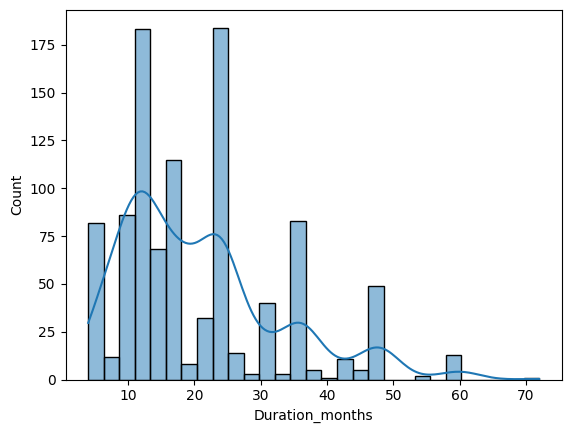

In [153]:
sns.histplot(german_data['Duration_months'], kde=True)

<Axes: ylabel='Duration_months'>

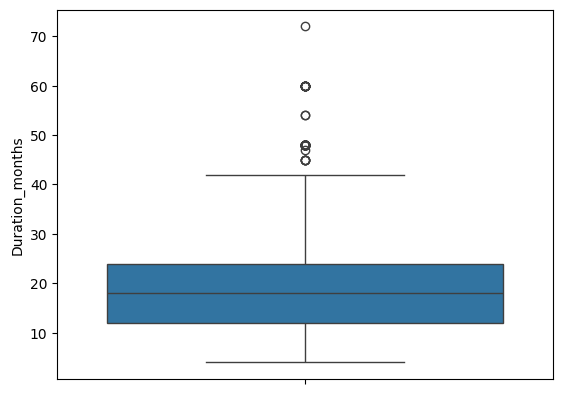

In [154]:
sns.boxplot(german_data['Duration_months'])

<Axes: xlabel='Credit_amount', ylabel='Count'>

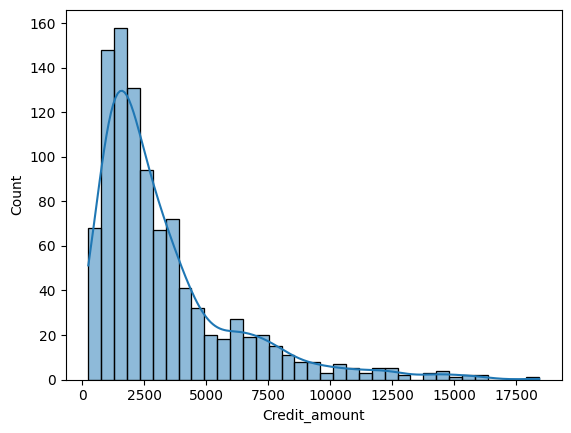

In [155]:
sns.histplot(german_data["Credit_amount"], kde=True)

<Axes: ylabel='Credit_amount'>

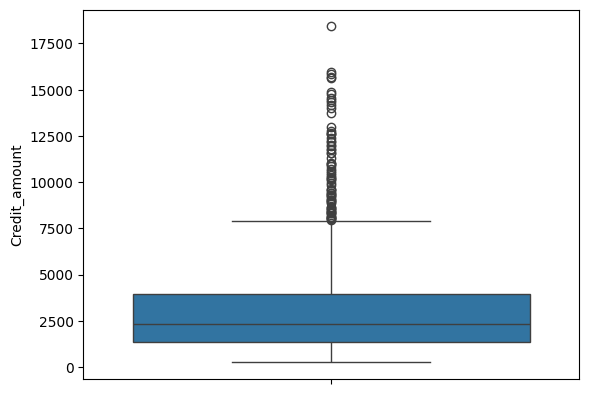

In [156]:
sns.boxplot(german_data["Credit_amount"])

In [126]:
col_anal(german_data, 5)

Your 5 have 5 values

 ['A65' 'A61' 'A63' 'A64' 'A62']
******************************************************************************************************************************************************************************************************** 



<pre style = "color: salmon">

Attibute 6:  (qualitative)
	      Savings account/bonds
	      A61 :          ... <  100 DM
	      A62 :   100 <= ... <  500 DM
	      A63 :   500 <= ... < 1000 DM
	      A64 :          .. >= 1000 DM
              A65 :   unknown/ no savings account

              

<pre> 

SO, this column tells us, where a person have savings account/bond or not, 

- and if yes, how much money they have in their accounts, 

>> We can do one thing here, 

- If your goal is to give a Visual Report, then you should convert these codes to meaningful categories, 

- Then you can do a visual report here, or if your goal is to create a model, then you can go ahead with 
  Ordinal Encoding, Becasue it do have a order here. (like no money, less money, more money like that)

  >> We will go for an Ordinal Encoding for this one.

  >> Let's look at next column.

  

In [127]:
col_anal(german_data, 6)

Your 6 have 5 values

 ['A75' 'A73' 'A74' 'A71' 'A72']
******************************************************************************************************************************************************************************************************** 



<pre style = "color: salmon">

Attribute 7:  (qualitative)
	      Present employment since
	      A71 : unemployed
	      A72 :       ... < 1 year
	      A73 : 1  <= ... < 4 years  
	      A74 : 4  <= ... < 7 years
	      A75 :       .. >= 7 years

          

<pre>

>> We can definitely go ahead with Ordinal Encoding. 



In [128]:
col_anal(german_data, 7)

Your 7 have 4 values

 [4 2 3 1]
******************************************************************************************************************************************************************************************************** 



<pre style = "color: salmon">

Attribute 8:  (numerical)
	      Installment rate in percentage of disposable income

          

<pre>

>> Now, this is nice:

1) Disposable income means -------------------- Income left after taxes and mandatory deductions.

2) Installment rate of this means:

- Out of his post-tax income, how many percentage of that he's spending to repay the loan monthly.

>> So, this is a historic data, and when a customer applies for a loan, this attribute is calculated as well.

>> Higher this ratio, higher the risk of this client paying back and then defaulted!!



In [129]:
col_anal(german_data, 8)

Your 8 have 4 values

 ['A93' 'A92' 'A91' 'A94']
******************************************************************************************************************************************************************************************************** 



<pre style = "color: salmon">

Attribute 9:  (qualitative)
	      Personal status and sex
	      A91 : male   : divorced/separated
	      A92 : female : divorced/separated/married
              A93 : male   : single
	      A94 : male   : married/widowed
	      A95 : female : single



<pre> 

- But in the dataset, I can only see 4 values here,

>> But I can do feature engineering here, by Seperating the sex and marital status.

- then sex I can go with binary encoding and 
- Marital status, I can go with OneHot encoding.



In [130]:
col_anal(german_data, 9)

Your 9 have 3 values

 ['A101' 'A103' 'A102']
******************************************************************************************************************************************************************************************************** 



<pre style = "color: salmon">

Attribute 10: (qualitative)
	      Other debtors / guarantors
	      A101 : none
	      A102 : co-applicant
	      A103 : guarantor

          

<pre>

Definitely, I'll go with OHE.

- Because, I cannot go with Ordinal Encoding, as order doesn't matter here. 

- and Binary is also not possible, which leaves us with OHE.


Attribute 10 is a nominal variable with three independent categories.
There is no inherent order between:

none

co-applicant

guarantor

👉 Therefore:

Ordinal encoding is inappropriate (imposes false ranking)

Binary encoding is technically possible but misleading (clusters categories unnecessarily)

One-Hot Encoding is the correct choice (treats categories independently)

✔ No information loss
✔ No artificial structure added
✔ Best for linear models
✔ Works well for tree models too




In [131]:
col_anal(german_data, 10)

Your 10 have 4 values

 [4 2 3 1]
******************************************************************************************************************************************************************************************************** 



<pre style = "color: salmon">

Attribute 11: (numerical)
	      Present residence since

          

<Axes: xlabel='Tenure', ylabel='Count'>

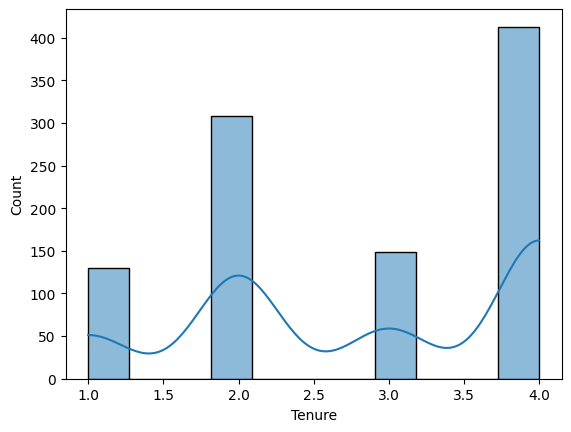

In [158]:
sns.histplot(german_data["Tenure"], kde = True)

<pre>

It measures stability of residence, not account duration.

This is a risk factor that banks traditionally care about.

>> We will leave this column as it is.



In [132]:
col_anal(german_data, 11)

Your 11 have 4 values

 ['A121' 'A122' 'A124' 'A123']
******************************************************************************************************************************************************************************************************** 



<pre style = "color: salmon">

Attribute 12: (qualitative)
	      Property
	      A121 : real estate
	      A122 : if not A121 : building society savings agreement/ life insurance
              A123 : if not A121/A122 : car or other, not in attribute 6
	      A124 : unknown / no property



<pre>

- This tells us, what financial assets, apart from income, does the applicant own?

⚠️ This attribute is ordinal.

There is a natural order:

Real estate > Insurance/savings > Car/other > None

>> So, we will use Ordinal Encoding to this one too.



In [133]:
col_anal(german_data, 12)

Your 12 have 53 values

 [67 22 49 45 53 35 61 28 25 24 60 32 44 31 48 26 36 39 42 34 63 27 30 57
 33 37 58 23 29 52 50 46 51 41 40 66 47 56 54 20 21 38 70 65 74 68 43 55
 64 75 19 62 59]
******************************************************************************************************************************************************************************************************** 



<pre style = "color: salmon">

Attribute 13: (numerical)
	      Age in years
          

<pre>

- We will leave as it is!!



<Axes: xlabel='Age', ylabel='Count'>

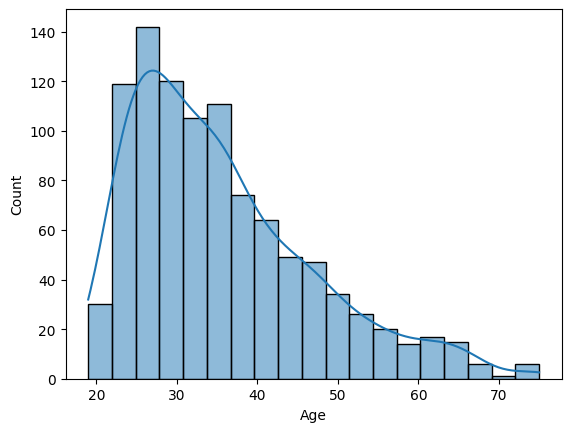

In [160]:
sns.histplot(german_data["Age"], kde=True)

<Axes: ylabel='Age'>

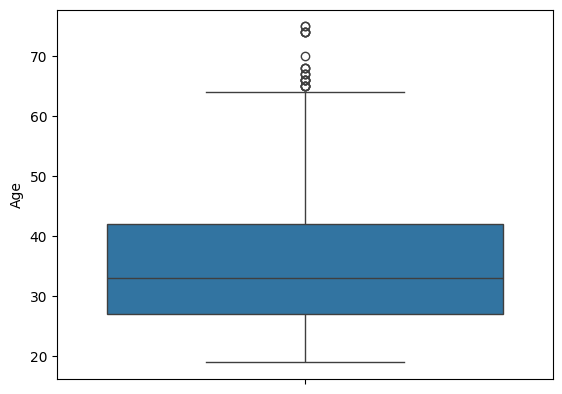

In [161]:
sns.boxplot(german_data["Age"])

In [134]:
col_anal(german_data, 13)

Your 13 have 3 values

 ['A143' 'A141' 'A142']
******************************************************************************************************************************************************************************************************** 



<pre style = "color: salmon">

Attribute 14: (qualitative)
	      Other installment plans 
	      A141 : bank
	      A142 : stores
	      A143 : none

          

<pre>

>> SO, this column tells us that:

- The applicant has installment obligations with another bank (other loans or EMIs).

- The applicant is paying installment plans to retail stores (e.g., furniture EMI, electronics EMI, etc.).

- The applicant has no other installment plans besides this loan request.


>> I think I will go with OHE here. 




In [135]:
col_anal(german_data, 14)

Your 14 have 3 values

 ['A152' 'A153' 'A151']
******************************************************************************************************************************************************************************************************** 



<pre style = "color: salmon">

Attribute 15: (qualitative)
	      Housing
	      A151 : rent
	      A152 : own
	      A153 : for free

          

<pre>

>> Again this is housing and it shows where the client is, 

- I should go with Ordinal or OHE???


1️⃣ “For free” is ambiguous

Could be living with parents → low expenses → good

Could be no stable housing (charity/homeless shelter) → bad

2️⃣ “Own” is usually good

But sometimes:

Owning a house means high property taxes or mortgage, which can stress income.

Renting might mean lower financial obligations depending on context.

So the risk rank can change depending on the borrower.



>> So, We will go with the OHE.



In [136]:
col_anal(german_data, 15)

Your 15 have 4 values

 [2 1 3 4]
******************************************************************************************************************************************************************************************************** 



<pre style = "color: slamon">

Attribute 16: (numerical)
              Number of existing credits at this bank

              

In [137]:
col_anal(german_data, 16)

Your 16 have 4 values

 ['A173' 'A172' 'A174' 'A171']
******************************************************************************************************************************************************************************************************** 



<pre style = "color: salmon">

Attribute 17: (qualitative)
	      Job
	      A171 : unemployed/ unskilled  - non-resident
	      A172 : unskilled - resident
	      A173 : skilled employee / official
	      A174 : management/ self-employed/
		     highly qualified employee/ officer

             

<pre>

>> This is an Ordinal one, 

There is a very clear progression of skill, income level, and job stability:

A171 < A172 < A173 < A174
(lowest → highest stability & income)

This is genuinely ordinal.





In [138]:
col_anal(german_data, 17)

Your 17 have 2 values

 [1 2]
******************************************************************************************************************************************************************************************************** 



<pre style = "color: salmon">

Attribute 18: (numerical)
	      Number of people being liable to provide maintenance for



<pre>

>> Actually in this dataset, value 1 and 2, Binning is done here.

- Menaing if there are no dependents or 1 dependents, it is stored as 1
- and if it is more than 2 dependents or 2 dependents it is stored as 2
- So, here the values are restricted to 1 and 2.



In [139]:
col_anal(german_data, 18)

Your 18 have 2 values

 ['A192' 'A191']
******************************************************************************************************************************************************************************************************** 



<pre style = "color: salmon">

Attribute 19: (qualitative)
	      Telephone
	      A191 : none
	      A192 : yes, registered under the customers name

        

<pre>

>> We can do binary encoding here.



In [140]:
col_anal(german_data, 19)

Your 19 have 2 values

 ['A201' 'A202']
******************************************************************************************************************************************************************************************************** 



<pre style = "color: salmon">

Attribute 20: (qualitative)
	      foreign worker
	      A201 : yes
	      A202 : no

          

<pre>

Binary encoding again.



In [141]:
col_anal(german_data, 20)

Your 20 have 2 values

 [1 2]
******************************************************************************************************************************************************************************************************** 



<pre style = "color: salmon">

>> Here 1 = Good, 2 = Bad 

>> This is our target.

---
---
---
---

<br><br>

## Feature Engineering

<pre>

So, here we are, as we understood the data, now we can proceed with naming the columsn first, 

- Then we will split that column, Sex_marital status, 

>> Then we will apply the preprocessing techniques.



In [142]:
german_data.columns = columns

In [143]:
german_data.head()

,Account_status,Duration_months,Credit_history,loan_Purpose,Credit_amount,Savings/Bonds_AC,Present_Employment_since,loan_wage_ratio,Marital_status_sex,co-debtors,...,Assets/Physical_property,Age,Other_loans,Housing,Existing Credit,Job_status,Dependents,Telephone,Foreign_worker,Credit_risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


<pre> 

>> First, we will map the Marital_status_sex with its categorical values, 

>> Or, we can do better, we will directly define a function and will insert 
   a ne wcolumn.

   

In [144]:
sex = german_data['Marital_status_sex'].apply(lambda x: "Male" if x in ["A91", "A93", "A94"] else "Female")

In [145]:
german_data.columns.get_loc("Marital_status_sex")

8

In [146]:
german_data.insert(8, "Sex", sex)

In [147]:
german_data.iloc[:,:10]

,Account_status,Duration_months,Credit_history,loan_Purpose,Credit_amount,Savings/Bonds_AC,Present_Employment_since,loan_wage_ratio,Sex,Marital_status_sex
0,A11,6,A34,A43,1169,A65,A75,4,Male,A93
1,A12,48,A32,A43,5951,A61,A73,2,Female,A92
2,A14,12,A34,A46,2096,A61,A74,2,Male,A93
3,A11,42,A32,A42,7882,A61,A74,2,Male,A93
4,A11,24,A33,A40,4870,A61,A73,3,Male,A93
...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,Female,A92
996,A11,30,A32,A41,3857,A61,A73,4,Male,A91
997,A14,12,A32,A43,804,A61,A75,4,Male,A93
998,A11,45,A32,A43,1845,A61,A73,4,Male,A93


In [148]:
mar_stat = german_data["Marital_status_sex"].map({"A91": "divorced/deparated", 
                                                   "A92": "divorced/separated/married", 
                                                   "A93": "single", "A94": "married/widowed"})

In [149]:
german_data.insert(9, "Marital_status", mar_stat)

In [150]:
german_data.drop(columns = "Marital_status_sex", inplace = True)

In [151]:
german_data.iloc[:, :12]

,Account_status,Duration_months,Credit_history,loan_Purpose,Credit_amount,Savings/Bonds_AC,Present_Employment_since,loan_wage_ratio,Sex,Marital_status,co-debtors,Tenure
0,A11,6,A34,A43,1169,A65,A75,4,Male,single,A101,4
1,A12,48,A32,A43,5951,A61,A73,2,Female,divorced/separated/married,A101,2
2,A14,12,A34,A46,2096,A61,A74,2,Male,single,A101,3
3,A11,42,A32,A42,7882,A61,A74,2,Male,single,A103,4
4,A11,24,A33,A40,4870,A61,A73,3,Male,single,A101,4
...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,Female,divorced/separated/married,A101,4
996,A11,30,A32,A41,3857,A61,A73,4,Male,divorced/deparated,A101,4
997,A14,12,A32,A43,804,A61,A75,4,Male,single,A101,4
998,A11,45,A32,A43,1845,A61,A73,4,Male,single,A101,4


<pre>

>> Let's export this processed data and we will start doing Transformation of the Columns.



In [152]:
# german_data.to_csv(r"../data/gd.csv", index=False)